# <span style="color:#F72585"><center>Introducción a tensores</center></span>

## <span style="color:#4361EE">Introducción</span>

En esta lección se introducen los conceptos de vectores, matrices y tensores. Los tensores son la estructura de datos más utilizada en el aprendizaje profundo. Desde el punto de vista matemático, un tensor generaliza los conceptos de escalares, vectores y matrices. 

Solamente haremos la introducción al concepto de tensores desde el punto de vista de las estructuras de datos requeridas en el aprendizaje profundo.

Los tensores constituyen el pilar fundamental de las estructuras de datos utilizadas en la inteligencia artificial (IA). Motores de aprendizaje profundo como Torch o TensorFlow se basan en Numpy, la librería por excelencia de Python para el manejo de tensores. Recientemente TensorFlow anunció el desarrollo propio de su librería de tensores en un intento de liberarse de Numpy.

Desde el punto vista del aprendizaje de máquinas, los tensores con arreglos multidimensionales que generalizan las matrices a múltiples y a los cuales se les agregan algunas características adicionales como la diferenciación automática, que desarrollaremos en otra lección. 

## <span style="color:#4361EE">Dimensión y tamaño de un tensor</span>

Los tensores pueden ser estructuras desde muy simples hasta muy complejos. Para poder describirlos, usamos los términos dimensión y tamaño. La siguiente imagen ilustra diferentes tipos de tensores. 

La `dimensión de un tensor` se define como el número de índices requeridos para indicar la posición de un elemento en el tensor. En la imagen, es escalar es un tensor de dimensión cero, porque no se requiere ningún índice para determinar la posición de su único elemento. Cada índice requerido para indicar la posición de un elemento determina una dimensión del tensor. Así en ejemplo, de arriba el escalar tiene dimensión cero, el vector dimensión 1, la matriz es de  dimensión 2 y el último objeto a la derecha es un tensor de de dimensión 4. 

El `tamaño de un tensor` corresponde al número de elementos que se tienen al largo de cada dimensión. En la imagen el vector tiene tamaño 2 , indicado (2,) por acuerdo de notación. La matriz tiene tamaño (2,3) y el tensor de la derecha tiene tamaño (1,4,1,2).

Para entender porque este último tensor tiene dimensión cuatro, observe lo siguiente. Hay un contenedor externo. Al representar el tensor en esta forma gráfica se da a entender que esta es la primera capa de varias posibles con la misma estructura. Al interior hay 4 compartimientos de tamaño (1,2), completando así el tamaño (1,4,1,2).
()

La siguiente ilustra una abstracción de juguete de un video con tres cuadros(frames) de color de forma (shape) $(2, 2)$ cada uno. Este seguro de entender la lógica de organización del tensor.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/ten_tensor_4_d.jpg" width="600" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

La próxima imagen muestra la organización de diferentes tipos de tensores.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/ten_tensores.jpg" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Ejemplos de tensores de diferentes  dimensiones y tamaños</p>
</figcaption>
</figure>

Fuente: A. Montenegro

### <span style="color:#4CC9F0">Nota acalaratoria</span>

El concepto de tensor en inteligencia artificial difiere del conocido en matemáticas y física. Un tensor desde el punto de vista matemático es a menudo, representado por una matriz de componentes que describen funciones relevantes para las coordenadas de un espacio. En pocas palabras, un tensor es una matriz de números que se transforman de acuerdo con ciertas reglas bajo un cambio de coordenadas. Un tensor se puede definir como un solo punto, una colección de puntos aislados, o se puede definir como un continuo de puntos en los que los elementos del tensor son funciones de posición, y el tensor forma lo que se conoce como campo tensor. Esto significa que en lugar de estar representado por un solo punto, el tensor se define en múltiples puntos juntos en un espacio.



<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/tensor_mat.png" width="400" height="400" /> 
</center>
</figure>


Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Tensor).

El lector interesado en el concepto matemático , puede consultar en [Wikipedia](https://en.wikipedia.org/wiki/Tensor).


Adicionalmente la dimensión de un tensor es un concepto algebraico y no geométrico. En geometría cada componente en un vector representa una dimensión. Entonces el vector $(3,4)$ es un vector bidimensional desde el punto de vista geométrico. Gráficamente lo representamos en un plano como se muestra en la siguiente imagen. Desde el punto de vista tensorial, el mismo objeto es unidimensional, debido a que solamente se necesita un índice para identificar cada uno de sus elementos. Esta la definición que nos interesa aquí. El siguiente código dibuja algunos vectores en $\mathbb{R}^2$. Los  matemáticos dicen que estos objetos geométricos tienen dimensión geométrica 2. Por favor revisa cada línea del código para estar seguro que lo entiende.

Por favor revisa cada línea del siguiente código para estar asegurarse que lo entiende. Cualquier duda consulte la documentación de Python. `ax.quiver`  crea el gráfico de los vectores, a partir de las coordenadas en $X, Y, U, V$.

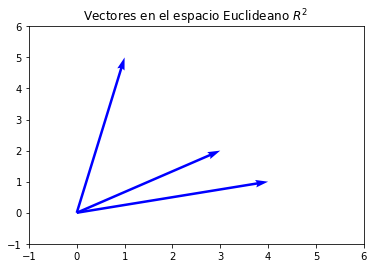

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
soa = np.array([[0, 0, 4, 1], [0, 0, 1, 5], [0, 0, 3, 2]])
X, Y, U, V = zip(*soa)

plt.figure()
plt.title('Vectores en el espacio Euclideano $R^2$ ')
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue')
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 6])
plt.draw()
plt.show()

## <span style="color:#4361EE">Escalares (Tensores de dimensión cero)</span>

Un tensor de dimensión cero representa una cantidad escalar. Es decir, un tensor de dimensión cero solamente contendrá un número y por tanto tiene tamaño 1.

## <span style="color:#4361EE">Vectores (Tensores unidimensionales)</span>

En esta sección revisamos el concepto de vector. Desde el punto de vista del aprendizaje profundo entendemos un vector como un contenedor de  *n* datos, cada uno de los cuales se identifica genéricamente mediante un índice. Por ejemplo supongamos que $w$ es un vector de tamaño tres. Este vector se representa genéricamente como:

$$
\begin{equation}
w = (w_1,w_2, w_3).
\end{equation}
$$

En estadística es usual escribir los vectores en columna. En este caso $w$ se escribe como:


$$
\begin{equation}
w = \begin{pmatrix} w_1\\ w_2 \\ w_3\end{pmatrix}
\end{equation}
$$


El tipo de valores que puede contener un vector debe ser de la misma clase por convención. Por ejemplo, si $w$ es un vector de números reales, entonces $z=(3.2\;, 1.5 \;, -7.2 \;, 0.0)$ es un vector real de tamaño cuatro. Matemáticamente se dice que el vector $z$ tiene dimensión cuatro. En otras palabras, la dimensión matemática de un vector es su tamaño.

El contenido y tipo de datos de un vector depende del contexto en que se está utilizando. Supongamos que se trata de construir una máquina de aprendizaje profundo que identifique dígitos escritos a mano en tonalidades de gris. Lo que se acostumbra a hacer es digitalizar las imágenes correspondientes, con lo cual se obtiene una matriz de números de tamaño digamos $255 \times 255$. Esta matriz puede facilmente transformarse a un vector, o mejor diríamos un tensor de dimensión 1, con $N = 255^2$ componentes.

### <span style="color:#4CC9F0">Ejemplo en NumPy</span>

En [NumPy](https://numpy.org/) el vector $w =(1,2,3)$ se puede crear así:

In [1]:
import numpy as np
# crea el vector (array)
w = np.array([1,2,3]) 
# lo imprime
print(w)
# Muestra el tamaño (shape) del vector
print(w.shape)

[1 2 3]
(3,)


### <span style="color:#4CC9F0">Discusión: ¿Vector o Tensor?</span>

Como se dijo arriba, En geometría la dimensión hace referencia al número de componentes con el que se representa un objeto en un espacio. Por lo general usamos el espacio Euclidiano, digamos $\mathbb{R}^2$ o $\mathbb{R}^3$.

Los tensores son objetos de tipo algebraico. La dimensión de un tensor se define como el número de índices requerido para representar todos a los elementos del tensor.

Entonces:

1. El vector $w = (w_1,w_2, w_3)$ tiene dimensión geométrica 3.
2. El tensor $w = (w_1,w_2, w_3)$ tiene dimensión 1 y tamaño (*shape* = 3).

**Asegúrese de comprender la diferencia**.

El tipo de valores que puede contener un vector debe ser de la misma clase por convención. Por ejemplo, si $w$ es un vector de números reales, entonces $z=(3.2\;, 1.5 \;, -7.2 \;, 0.0)$ es un vector real de tamaño cuatro. Matemáticamente se dice que el vector $z$ tiene dimensión cuatro. En otras palabras, la dimensión matemática de un vector es su tamaño.

El contenido y tipo de datos de un vector depende del contexto en que se está utilizando. Supongamos que se trata de construir una máquina de aprendizaje profundo que identifique dígitos escritos a mano en tonalidades de gris. Lo que se acostumbra a hacer es digitalizar las imágenes correspondientes, con lo cual se obtiene una matriz de números de tamaño digamos $255 \times 255$. Esta matriz puede fácilmente transformarse a un vector, o mejor diríamos un tensor de dimensión 1, con $N = 255^2$ componentes.

## <span style="color:#4361EE">Aritmética básica de tensores unidimensionales</span>

Mientras no se diga lo contrario, asumiremos que los tensores que usaremos tienen el mismo tamaño. Por facilidad, en las definiciones usaremos tensores unidimensionales de tamaño $n=3$. En realidad el tamaño de los tensores unidimensionales pueden ser cualquier número entero positivo $n$ y las definiciones se generalizan de forma obvia.

Supongamos que $a= (a_1,a_2,a_3)$ y $b=(b_1,b_2,b_3)$ son dos vectores. La suma entre $a$ y $b$ es un vector $c$ definido por:

$$
c = a+b = (a_1+b_1, a_2+b_2,a_3+b_3)
$$

Por ejemplo, con Numpy escribimos:

In [3]:
a = np.array([1,2,3])
b = np.array([7,8,9])
c = a + b
print(c)

[ 8 10 12]


Similarmente la diferencia  de vectors $a-b$ es definida por:

$$
c = a-b = (a_1-b_1, a_2-b_2,a_3-b_3)
$$

Con Numpy operamos así:

In [4]:
a = np.array([1,2,3])
b = np.array([7,8,9])
c = a - b
print(c)

[-6 -6 -6]


El producto de Hadamard, o producto elemento por elemento entre dos vectores se denota $a \odot b$ y se define como:

$$
c = a\odot b = (a_1*b_1, a_2*b_2,a_3*b_3).
$$

En Python el producto de Hadamard se implementa simplemente usando el operador de multiplicación ( * ). Veamos:


In [5]:
a = np.array([1,2,3])
b = np.array([7,8,9])
c = a * b
print(c)

[ 7 16 27]


La división entre vectores no es una operación formalmente definida. En ocasiones sin embargo se requiere dividir los elementos de un vector entre los elementos de otro, elemento a elemento. Esta operación se implementa en Python simplemente usando el operador división (/).

In [6]:
a = np.array([1,2,3])
b = np.array([7,8,9])
c = a / b
print(c)

[0.14285714 0.25       0.33333333]


## <span style="color:#4361EE">Matrices (Tensores bidimensionales)</span>

Una matriz es una organización (tensor) bidimensional de objetos del mismo tipo. Por ejemplo una matriz  $M$ de tamaño $2\times 3$ puede ser:

$$
\begin{pmatrix} 1 & 2 & 3\\
4 &5 & 6
\end{pmatrix}
$$

Las matrices son muy utilizadas en prácticamente todas las áreas de la ciencia y la tecnología. 

En el caso del aprendizaje profundo, y más generalmente en Estadística las matrices se usan para representar conjuntos de datos. En los casos de regresión, las filas usualmente representan individuos y las columnas variables.

En adelante llamaremos a las matrices tensores bidimensionales (o de dos dimensiones). Entonces una matriz que tiene $m$ filas y $n$ columnas, es un tensor bidimensional de tamaño (*shape*) $=(m,n)$.

El tensor $M$ se representa en NumPy de la siguiente forma:

In [7]:
import numpy as np

# Crea el tensor
M = np.array([[1,2,3],
              [4,5,6]])
# Imprime el Tensor
print(M)
# Muestra la forma (shape)
M.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

## <span style="color:#4361EE">Creación de algunos tensores bidimensionales</span>

### <span style="color:#4CC9F0">Tensor vacío</span>

La función *empty()* crea un arreglo de la forma especificada. 

In [11]:
v = np.empty([2,3])
print(v)
print(v.shape)

[[4. 1. 1.]
 [5. 3. 2.]]
(2, 3)


La salida puede parecer un poco extraña. En realidad lo que hace Numpy es reservar el espacio de memoria necesario para mantener un arreglo de tamaño $(2, 3)$, asignarle el nombre *v* en la tabla de objetos definidos dinámicamente y nada más. Entonces la información que se encontraba es ese lugar no se modifica. De hecho si volvemos a correr en seguida la celda anterior de código, la salida no debe cambiar.


Observe que *v* es un tensor que tiene forma (*shape*) $2\times2$. En NumPy un tensor puede   estar compuesto por uno o más tensores. La dimensión del tensor *v* es 2. Se requiere un objeto de doble entrada para representar un tensor bidimensional. Dese cuenta que al arreglo es mostrado como una lista con dos elementos, cada uno de los cuales es un arreglo de tamaño 3. Internamente, una arreglos no se almacena como una lista.

### <span style="color:#4CC9F0">Tensor de ceros</span>

La función *zeros()* crea un arreglo de la forma especificada relleno de ceros. Por ejemplo

In [9]:
w = np.zeros([3,2])
print(w)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


### <span style="color:#4CC9F0">Arreglo de unos</span>

La función *ones()* crea un arreglo de la forma especificada relleno de unos.

In [10]:
w = np.ones([2,2])
print(w)

[[1. 1.]
 [1. 1.]]


### <span style="color:#4CC9F0"> Apilamiento  de arreglos (stack)</span>

#### Vertical: `vstack`

Con la función *vstack()*. Apila a lo largo del eje 0.

In [19]:
v = np.ones([2,3])
w = np.array([2,2,2])
z = np.vstack((v,w))

print('v = {}\n'.format(v))
print('w = {}\n'.format(w))
print('z = {}\n'.format(z))

print('tamaño final = {}'.format(z.shape))

v = [[1. 1. 1.]
 [1. 1. 1.]]

w = [2 2 2]

z = [[1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]]

tamaño final = (3, 3)


#### Horizontal: `hstack`

Con la función *hstack()*. Apila a lo largo del eje 1.

In [20]:
v = np.ones([2,3])
w = np.array([[5],[5]])
z = np.hstack((v,w))

print('v = {}\n'.format(v))
print('w = {}\n'.format(w))
print('z = {}\n'.format(z))

print('tamaño final = {}'.format(z.shape))

v = [[1. 1. 1.]
 [1. 1. 1.]]

w = [[5]
 [5]]

z = [[1. 1. 1. 5.]
 [1. 1. 1. 5.]]

tamaño final = (2, 4)


#### Apilamiento a lo largo de cualquier eje. `stack`

Con la función *stack()*. Apila a lo largo cualquier  eje. La función *stack()* puede usarse para los dos casos anteriores cambiando el eje a lo largo del cual se hace la apilación. Revise el siguiente ejemplo en el cual apilamos una lista de arreglos a lo largo de cada uno de los ejes.

Generamos una lista de 3 arreglos, cada uno de forma $(3, 4)$

In [7]:
import numpy as np
arrays = [np.random.randn(3, 4) for _ in range(3)]
print('Longitud de arrays =', len(arrays))
print('arrays[0] = \n', arrays[0])
print('arrays[1] = \n', arrays[1])
print('arrays[1] = \n', arrays[2])

Longitud de arrays = 3
arrays[0] = 
 [[ 0.27489071 -0.01658615 -1.29846514  0.38246922]
 [-1.07830623 -0.25497533 -0.92488366  2.7538324 ]
 [-1.05486389 -0.35849278 -0.79294011  0.6090218 ]]
arrays[1] = 
 [[ 0.06443883  1.58202301  2.40406082 -1.08826724]
 [ 0.14263298 -0.2733137  -0.48660215 -0.0996398 ]
 [ 0.28154351  1.35211661 -1.37996137  0.30983727]]
arrays[1] = 
 [[ 0.55115766 -1.54684105  1.49651068 -1.11611737]
 [ 0.37004679 -1.21559351 -0.37146047 -2.00565897]
 [-1.65542207  0.58912902 -0.4928767   0.23027823]]


In [8]:
np.stack(arrays, axis=0)

array([[[ 0.27489071, -0.01658615, -1.29846514,  0.38246922],
        [-1.07830623, -0.25497533, -0.92488366,  2.7538324 ],
        [-1.05486389, -0.35849278, -0.79294011,  0.6090218 ]],

       [[ 0.06443883,  1.58202301,  2.40406082, -1.08826724],
        [ 0.14263298, -0.2733137 , -0.48660215, -0.0996398 ],
        [ 0.28154351,  1.35211661, -1.37996137,  0.30983727]],

       [[ 0.55115766, -1.54684105,  1.49651068, -1.11611737],
        [ 0.37004679, -1.21559351, -0.37146047, -2.00565897],
        [-1.65542207,  0.58912902, -0.4928767 ,  0.23027823]]])

In [ ]:
 A lo largo del eje 1.

## <span style="color:#4361EE">Creación de tensores multidimensionales</span>

En Python una lista de listas puede crearse como se muestra en el siguiente fragmento de código. En el código se observa como acceder a la primera lista y como acceder al segundo elemento de la segunda lista. Asegúrese de entender la lógica involucrada.

In [21]:
a = np.array([[1,2,3],[4,5,6]])

print('a=',a)
print()
print('a[0]=',a[0])
print()

print('a[1][1]=',a[1][1])

a= [[1 2 3]
 [4 5 6]]

a[0]= [1 2 3]

a[1][1]= 5


### <span style="color:#4CC9F0">Un ejemplo con arreglos tridimensionales</span>


Para ayudar a entender la indexación y rebanado de arreglos, observe el siguiente ejemplo. Asegúrese de entender completamente la lógica. Vamos a crear un tensor tridimensional de tamaño $(4, 3, 1)$.

In [23]:
a = np.array([
              [[1,2],
               [3,4],
               [5,6]],
             
              [[7,8],
               [9,10],
               [11,12]],
    
              [[13,14],
               [15,16],
               [17,18]],
    
              [[19,20],
               [21,22],
               [23,24]]
            ])

print('a.shape=', a.shape)

print('\na =',a)

a.shape= (4, 3, 2)

a = [[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


## <span style="color:#4361EE">Ejercicios</span>

Investigue sobre los siguientes temas:

1. Indexación de tensores NumPy.
2. Rebanado (slicing) tensores.
3. Reorganización (Reshape) de tensores.



### <span style="color:#4CC9F0">Ayuda</span>

Revise la lección de Numpy.

### <span style="color:#4CC9F0">Ejercicios adicionales</span>

1. Cree una lista 5 de arreglos aleatorios de forma $(2,4,3,5)$.
1. Apile los arreglos por cada uno de los cuatro ejes.
1. Interprete los resultados.